In [1]:
import cv2 
import matplotlib.pyplot as plt
import torch
from glob import glob
import os
import numpy as np
import torch.nn as nn 
from torchsummary import summary
import torch.nn.functional as F


In [40]:
from disciminator_model import Discriminator
from generator_model import Generator

In [95]:
class DataSet(torch.utils.data.Dataset):
    def __init__(self, path_train,path_test,imgz=256): 
        self.data_train = glob(path_train + '/*' + '.png')
        self.data_train.sort()
        self.data_test = glob(path_test + '/*' + '.jpg')
        self.data_test.sort()
        self.imgz = imgz
        
    def __len__(self): 
        return len(self.data_train)

    def __getitem__(self,idx):
        #### train #####
        img_train = cv2.imread(self.data_train[idx])
        print(self.data_train[idx])
        h,w,c = img_train.shape
        img_train_resize = cv2.resize(img_train,(self.imgz,self.imgz))
        img_train_resize = img_train_resize /255
        img_train_resize = np.transpose(img_train_resize, (2, 0, 1))  
        img_train_resize = torch.tensor(img_train_resize, dtype=torch.float32)
        #### test #####
        
        img_test = cv2.imread(self.data_test[idx])
        print(self.data_test[idx])
        h,w,c = img_test.shape
        img_test_resize = cv2.resize(img_test,(self.imgz,self.imgz))
        img_test_resize = img_test_resize /255
        img_test_resize = np.transpose(img_test_resize, (2, 0, 1))  
        img_test_resize = torch.tensor(img_test_resize, dtype=torch.float32)
        return img_train_resize,img_test_resize
        

In [184]:
checkpoint = torch.load(f"checkpoints/cyclegan_epoch_181.pth")

In [185]:
gen_Z = Generator(3).to('cuda')

In [186]:
gen_Z.load_state_dict(checkpoint['gen_MRI2CT'])


<All keys matched successfully>

In [187]:
print(model)

<All keys matched successfully>


In [188]:
test_dataset = DataSet('../Dataset/images/testA/','../Dataset/images/testB/')


In [189]:
model

<All keys matched successfully>

In [248]:
X,y = test_dataset[50]

../Dataset/images/testA\ct1158.png
../Dataset/images/testB\mri1150.jpg


In [249]:
# torch.unsqueeze(X,0)

In [250]:
gen_Z.eval()  # or gen_Z.eval() depending on the direction
with torch.no_grad():
    X = X.to('cuda')
    y =y.to('cuda')
    output_image = gen_Z(torch.unsqueeze(X,0))

In [251]:
out = torch.permute( torch.squeeze(output_image),(1,2,0) ).cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


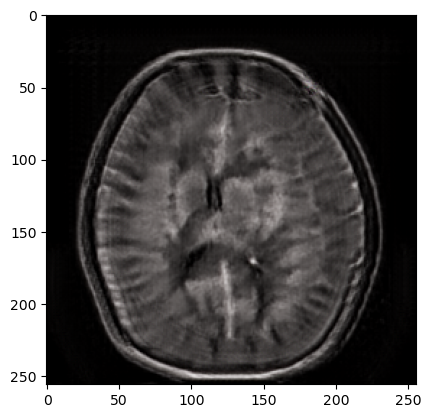

In [252]:
plt.imshow(out)

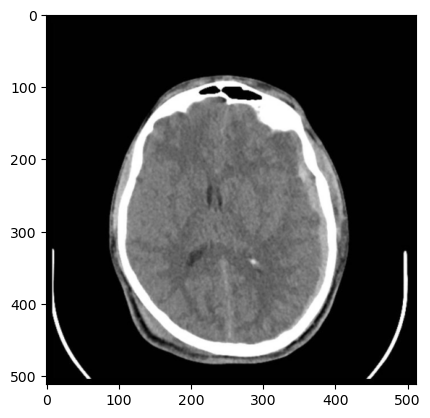

In [253]:
plt.imshow(cv2.imread('../Dataset/images/testA/ct1158.png'))

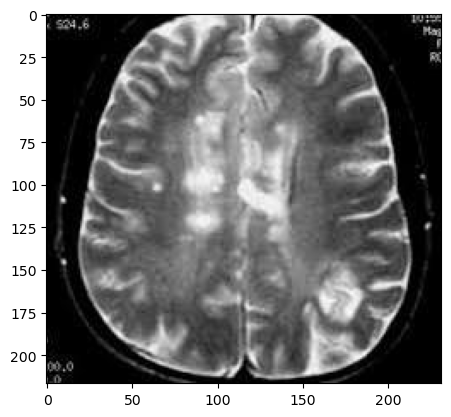

In [254]:
plt.imshow(cv2.imread('../Dataset/images/testB/mri1158.jpg'))

In [11]:
model.eval()
with torch.no_grad(): 
    X, y = X.to('cuda'), y.to('cuda')
    yHat_val = model(torch.unsqueeze(X,0))

In [12]:
yHat = torch.permute(yHat_val.cpu(),(0,2,3,1)).numpy()

In [13]:
yHat = np.squeeze(yHat)

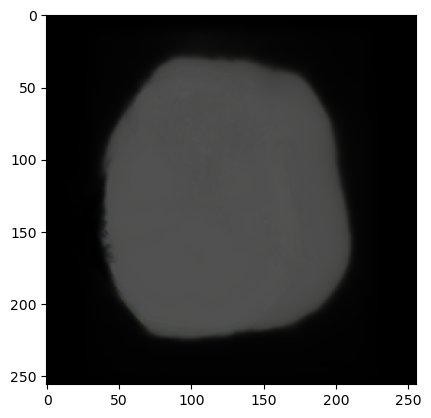

In [14]:
plt.imshow(yHat,cmap='gray')

In [213]:
train =  np.load('../DatasetPair/train_input.npy/train_input.npy')

In [214]:
test =  np.load('../DatasetPair/train_output.npy/train_output.npy')

In [245]:
i=9

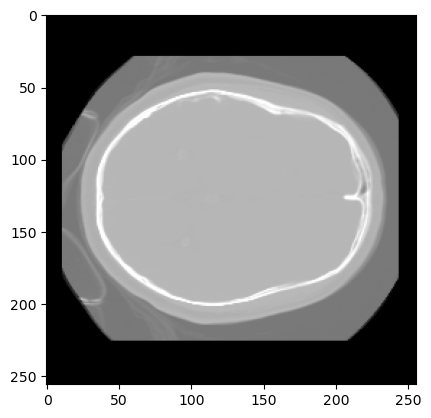

In [246]:
plt.imshow(test[i],cmap='gray')

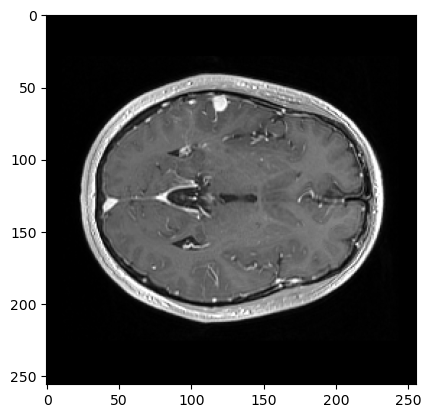

In [247]:
plt.imshow(train[i],cmap='gray')

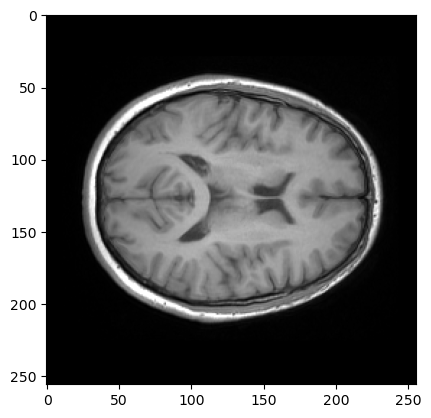

In [244]:
plt.imshow(train[i-1],cmap='gray')